## Python Project EDA & Visualization - Telecom Churn

### Importing the esssential libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import scipy.stats as stats 
import sklearn 

### Loading the Dataset

In [2]:
data = pd.read_csv("C:/Users/Zentacross/Desktop/Telecom.csv")
data.head()

,CustomerID,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,...,Year,Month,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,1998,1,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,1983,9,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,1996,5,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,2001,2,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,1980,12,No,Fiber optic,No,No,No,No,No,No


## Get info about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     0 non-null      float64
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  Day               7043 non-null   int64  
 14  Year              7043 non-null   int64  
 15  Month             7043 non-null   int64  
 16  MultipleLines     7043 non-null   object 


## Get the number of rows and columns

In [4]:
data.shape

(7043, 24)

## Statistical Summary

In [5]:
data.describe()

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Day,Year,Month
count,7043.000000,7043.000000,7032.000000,0.0,7043.000000,7043.000000,7043.000000
mean,32.416442,64.761692,2283.300441,NaN,15.443277,1996.036490,6.563396
std,24.526454,30.090047,2266.771362,NaN,8.693037,9.505657,3.432856
min,1.000000,18.250000,18.800000,NaN,1.000000,1980.000000,1.000000
25%,9.000000,35.500000,401.450000,NaN,8.000000,1988.000000,4.000000
50%,29.000000,70.350000,1397.475000,NaN,16.000000,1996.000000,7.000000
75%,55.000000,89.850000,3794.737500,NaN,23.000000,2004.000000,10.000000
max,72.000000,118.750000,8684.800000,NaN,30.000000,2012.000000,12.000000


### Checking the missing values

In [6]:
data.isnull().sum()

CustomerID             0
Tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
Gender                 0
SeniorCitizen       7043
Partner                0
Dependents             0
Day                    0
Year                   0
Month                  0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
dtype: int64

### Dropping the Senior Citizen columns

In [7]:
data.drop(labels=['SeniorCitizen'], axis=1, inplace=True)
data.head()

,CustomerID,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,...,Year,Month,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,1998,1,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,1983,9,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,1996,5,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,2001,2,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,1980,12,No,Fiber optic,No,No,No,No,No,No


### Checking the duplicate values

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

CustomerID           0
Tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Gender               0
Partner              0
Dependents           0
Day                  0
Year                 0
Month                0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

### Getting the graphical info about total_charges

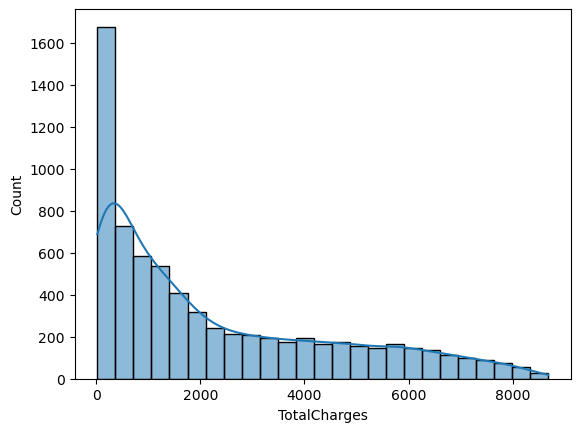

In [10]:
sns.histplot(data['TotalCharges'], kde=True)
plt.show()

In [11]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
data.isnull().sum()

CustomerID          0
Tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Gender              0
Partner             0
Dependents          0
Day                 0
Year                0
Month               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Extracting the Age of customers

In [12]:
data['Age'] = 2025 - data['Year']
data.head()

,CustomerID,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,...,Month,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Age
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,1,No phone service,DSL,No,Yes,No,No,No,No,27
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,9,No,DSL,Yes,No,Yes,No,No,No,42
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,5,No,DSL,Yes,Yes,No,No,No,No,29
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,2,No phone service,DSL,Yes,No,Yes,Yes,No,No,24
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,12,No,Fiber optic,No,No,No,No,No,No,45


# EDA

### Univariate Analysis

In [13]:
# Percentage of Churn

data['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [14]:
# Percentage of Contract

data['Contract'].value_counts(normalize=True) * 100

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

In [15]:
# Percentage of InternetService

data['InternetService'].value_counts(normalize=True) * 100

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

In [16]:
# Percentage of PaymentMethod

data['PaymentMethod'].value_counts(normalize=True) * 100

PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

In [17]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Customer Churn Count", "Contract Type Count",
                                                    "Internet Service Count", "Payment Method Count"))

# Histogram 1: Churn
churn_fig = px.histogram(data, x='Churn', color='Churn')
for trace in churn_fig.data:
    
    fig.add_trace(trace, row=1, col=1)

# Histogram 2: Contract
contract_fig = px.histogram(data, x='Contract', color='Contract')
for trace in contract_fig.data:
    
    fig.add_trace(trace, row=1, col=2)

# Histogram 3: InternetService
internet_fig = px.histogram(data, x='InternetService', color='InternetService')
for trace in internet_fig.data:
    
    fig.add_trace(trace, row=2, col=1)

# Histogram 4: PaymentMethod
payment_fig = px.histogram(data, x='PaymentMethod', color='PaymentMethod')
for trace in payment_fig.data:
    
    fig.add_trace(trace, row=2, col=2)

fig.show()

### Monthly Charges distribution 

In [18]:
plt.figure(figsize = (8, 5))
fig = px.histogram(data, x='MonthlyCharges', nbins=100, title='Distribution of Monthly Charges')
fig.show()

<Figure size 800x500 with 0 Axes>

## Outliers Detection in numeric data

In [19]:
fig = px.box(data, y='MonthlyCharges',
             title='Boxplot of Monthly Charges (Outlier Detection)',
             width=600) 
fig.show()


In [20]:
fig = px.box(data , y ='TotalCharges', title='Boxplot of Total Charges (Outlier Detection)', width = 600)
fig.show()

In [21]:
data[data["Gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [22]:
data[data['Gender'] == "Female"][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

### Extracting outlier values using the Interquartile Range (IQR):

In [23]:
def iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example for MonthlyCharges
Monthly_chrges = iqr(data, 'MonthlyCharges')
print(f'Total outliers in MonthlyCharges: {len(Monthly_chrges)}')

# Example for TotalCharges
Total_chrges = iqr(data, 'TotalCharges')
print(f'Total outliers in TotalCharges: {len(Total_chrges)}')

Total outliers in MonthlyCharges: 0
Total outliers in TotalCharges: 0


### Bivariate Analysis

## Correlation Matrix Analysis

In [24]:
# Correlation between the numeric columns

numerical_cols = ['Age','Tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = data[numerical_cols].corr(method = 'spearman')
correlation_matrix

,Age,Tenure,MonthlyCharges,TotalCharges
Age,1.000000,-0.017542,-0.007611,-0.017321
Tenure,-0.017542,1.000000,0.275013,0.889099
MonthlyCharges,-0.007611,0.275013,1.000000,0.637475
TotalCharges,-0.017321,0.889099,0.637475,1.000000


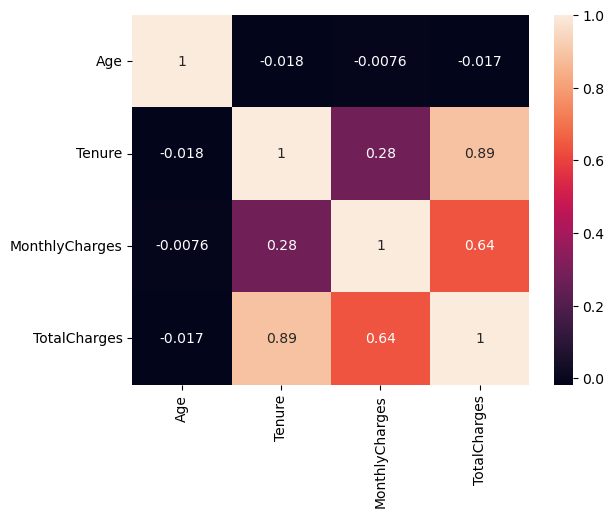

In [25]:
# Correlation between the numeric columns visually

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

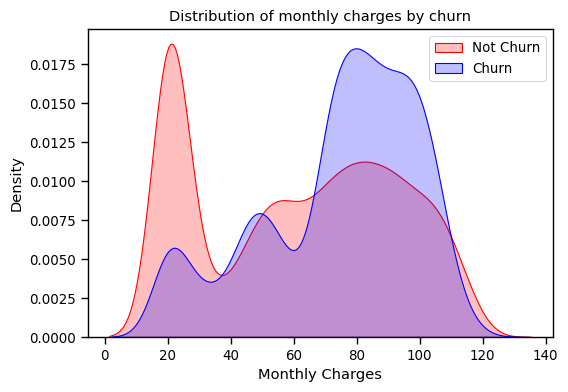

In [26]:
sns.set_context("paper",font_scale=1.1)

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

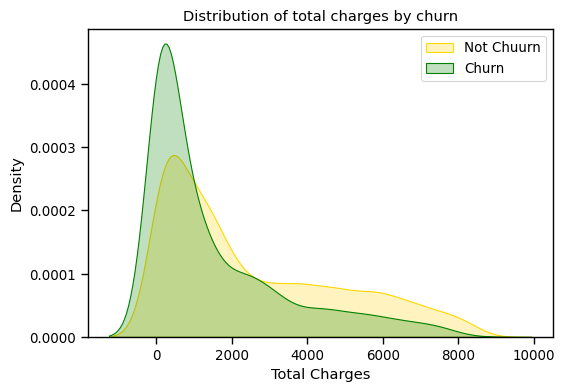

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True)
ax.legend(["Not Chuurn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

### Churn Distribution

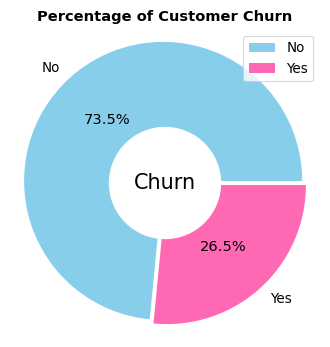

In [28]:
color = ['skyblue','hotpink']
type_ = ["No" ,"Yes"]
explode = [0.02,0.02]

plt.figure(figsize=(4,4))
plt.pie(data["Churn"].value_counts(), colors= color, wedgeprops={'width' : 0.7}, autopct = '%1.1f%%', labels = type_, explode=explode)

circle = plt.Circle((0,0), 0.4, color = 'white')
plt.gca().add_artist(circle)

plt.text(0, 0, "Churn", ha='center', va= 'center', fontsize = 15)

plt.title("Percentage of Customer Churn", fontweight = "bold")
plt.axis('equal')
plt.legend()
plt.show()

### Churn Distribution w.r.t Gender

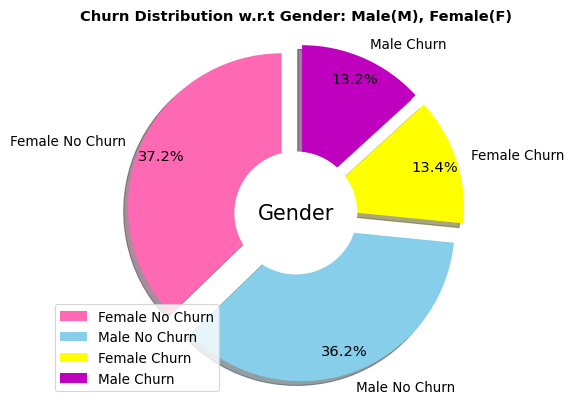

In [29]:
labels = ["Female No Churn", "Male No Churn", "Female Churn", "Male Churn"]
sizes = [2619,2544,939,930]
colors = ['hotpink','skyblue','yellow','m']
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.85,startangle=90, explode=explode, shadow= True)
plt.text(0, 0, "Gender", ha='center', va= 'center', fontsize = 15)

centre_circle = plt.Circle((0,0), 0.4, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontweight = "bold")
plt.axis('equal')
plt.legend(labels , loc = 'lower left')
plt.show()

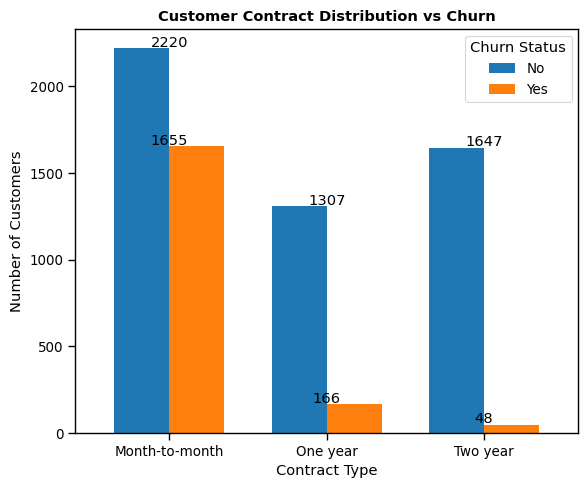

In [30]:
contract_churn = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
contract_churn

#Plotting it into Bar Chart

contract_churn.plot(kind='bar', figsize=(6,5), width=0.7)
# Show numbers of each bars

for i in contract_churn.columns:
    for j in range(len(contract_churn)):
        plt.text(j, contract_churn[i].iloc[j]+10, 
                 contract_churn[i].iloc[j], ha='center')

plt.title("Customer Contract Distribution vs Churn", fontweight='bold')
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn Status")
plt.tight_layout()
plt.show()


### Conclusion : Customers having monthly contract were more likely to churn

### Churn Distribution w.r.t Payment Method

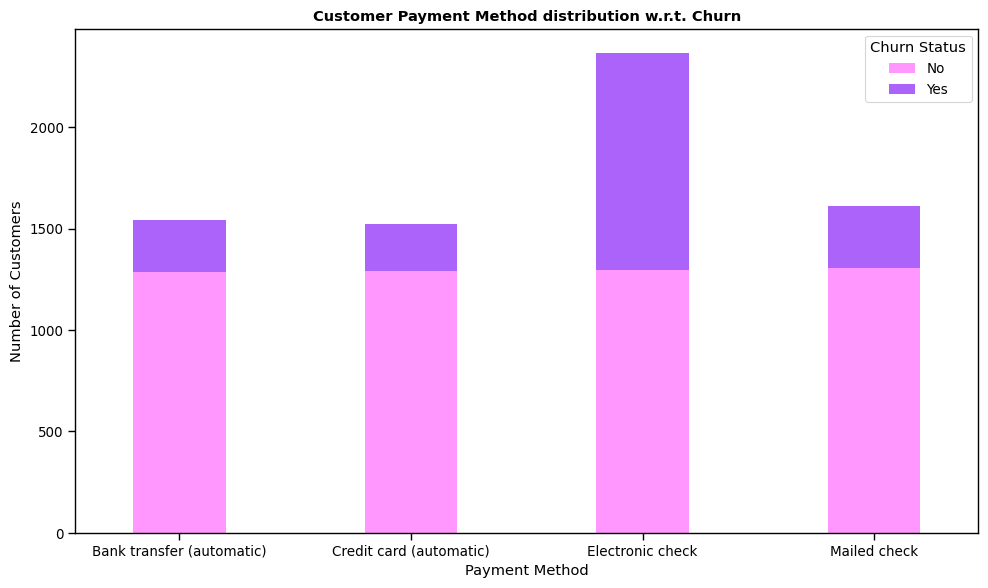

In [31]:
mode_churn = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

mode_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#FF97FF","#AB63FA"], width = 0.4)

plt.title("Customer Payment Method distribution w.r.t. Churn", fontweight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0, ha='center')  
plt.legend(title="Churn Status", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### Conclusion : Customers having Electronic check were more likely to churn

### Churn Distribution w.r.t Internet Service

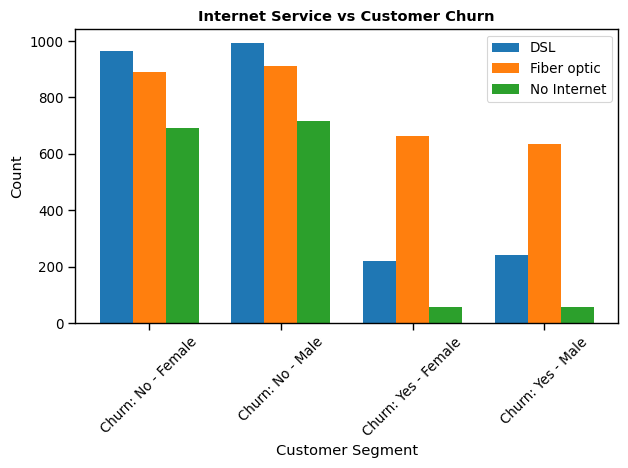

In [32]:
categories = ['Churn: No - Female', 'Churn: No - Male', 'Churn: Yes - Female', 'Churn: Yes - Male']
x = np.arange(len(categories))  
width = 0.25 

dsl = [965, 992, 219, 240]
fiber_optic = [889, 910, 664, 633]
no_internet = [690, 717, 56, 57]

plt.bar(x - width, dsl, width=width, label='DSL')
plt.bar(x, fiber_optic, width=width, label='Fiber optic')
plt.bar(x + width, no_internet, width=width, label='No Internet')

plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Internet Service vs Customer Churn', fontweight = 'bold')
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Conclusion : Customers having fiber optic internet service were more likely to churn

### Churn Distribution w.r.t Partners

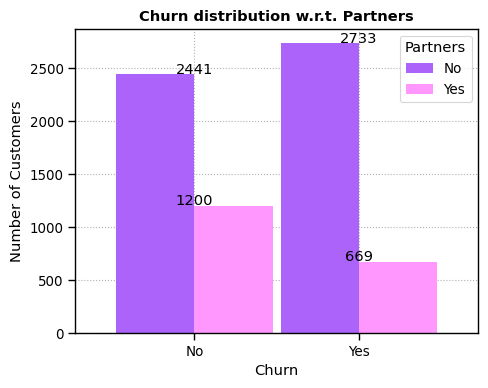

In [33]:
partner_churn = data.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

partner_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in partner_churn.columns:
    for j in range(len(partner_churn)):
        plt.text(j, partner_churn[i].iloc[j]+10, 
                 partner_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. Partners", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="Partners", loc = 'upper right')

plt.tight_layout()
plt.show()

### Conclusion : Customers having no partner were more likely to churn

In [34]:
OS_churn = data.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
OS_churn

Churn,No,Yes
OnlineSecurity,,
No,3450,1574
Yes,1724,295


### Churn Distribution w.r.t Online Security

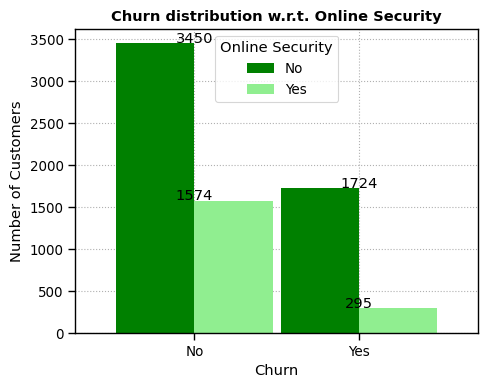

In [35]:
OS_churn = data.groupby(['OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "lightgreen", "No": "green"}

OS_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in OS_churn.columns:
    for j in range(len(OS_churn)):
        plt.text(j, OS_churn[i].iloc[j]+10, 
                 OS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. Online Security", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="Online Security", loc = 'upper center')

plt.tight_layout()
plt.show()

### Conclusion : Customers having no online security were more likely to churn

In [36]:
PLB_churn = data.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
PLB_churn

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


### Churn Distribution w.r.t PaperLess Billing

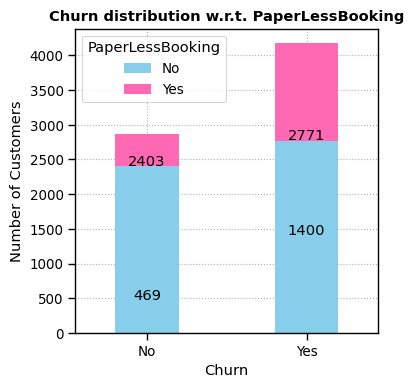

In [37]:
PLB_churn = data.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": 'hotpink', "No": 'skyblue'}

PLB_churn.plot(kind='bar', stacked = True, figsize=(4,4), width=0.4, zorder = 2, color = color_map, )

for i in PLB_churn.columns:
    for j in range(len(PLB_churn)):
        plt.text(j, PLB_churn[i].iloc[j]+10, 
                 PLB_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. PaperLessBooking", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="PaperLessBooking", loc = 'upper left')

plt.tight_layout()
plt.show()

### Conclusion : Customers having no paperless billing were more likely to churn

### Churn Distribution w.r.t Tech Support

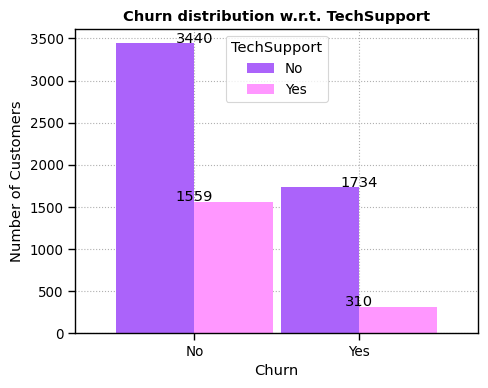

In [38]:
TS_churn = data.groupby(['TechSupport', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

TS_churn.plot(kind='bar', figsize=(5,4), width=0.95, zorder = 2, color = color_map, )

for i in TS_churn.columns:
    for j in range(len(TS_churn)):
        plt.text(j, TS_churn[i].iloc[j]+10, 
                 TS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. TechSupport", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="TechSupport", loc = 'upper center')

plt.tight_layout()
plt.show()

In [39]:
PS_churn = data.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
PS_churn

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


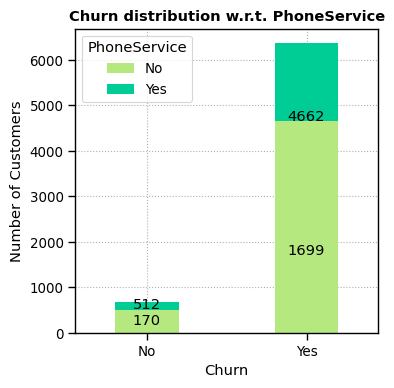

In [40]:
PS_churn = data.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

PS_churn.plot(kind='bar', stacked = True, figsize=(4,4), width=0.4, zorder = 2, color = color_map, )

for i in PS_churn.columns:
    for j in range(len(PS_churn)):
        plt.text(j, PS_churn[i].iloc[j]+10, 
                 PS_churn[i].iloc[j], ha='center')

plt.title("Churn distribution w.r.t. PhoneService", fontweight='bold')

plt.grid(visible= True, ls =":", zorder = 1)
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.xticks(rotation=0)
plt.legend(title="PhoneService", loc = 'upper left')

plt.tight_layout()
plt.show()

In [41]:
from datetime import date
data['age'] = date.today().year - data['Year']

In [42]:
def print_data_unique_vals(data):
    for col in data.columns:
        unique_vals = data[col].unique()
        if len(unique_vals) < 10:
            print("Unique values for column {}: {}".format(col, unique_vals))
        else:
            if is_string_dtype(data[col]):
                print("column {} has values string type".format(col))
            elif is_numeric_dtype(data[col]):
                print("column {} is numerical".format(col))
print_data_unique_vals(data)

column CustomerID has values string type
column Tenure is numerical
Unique values for column PhoneService: ['No' 'Yes']
Unique values for column Contract: ['Month-to-month' 'One year' 'Two year']
Unique values for column PaperlessBilling: ['Yes' 'No']
Unique values for column PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column MonthlyCharges is numerical
column TotalCharges is numerical
Unique values for column Churn: ['No' 'Yes']
Unique values for column Gender: ['Female' 'Male']
Unique values for column Partner: ['Yes' 'No']
Unique values for column Dependents: ['No' 'Yes']
column Day is numerical
column Year is numerical
column Month is numerical
Unique values for column MultipleLines: ['No phone service' 'No' 'Yes']
Unique values for column InternetService: ['DSL' 'Fiber optic' 'No']
Unique values for column OnlineSecurity: ['No' 'Yes']
Unique values for column OnlineBackup: ['Yes' 'No']
Unique values for column DevicePro

In [43]:
def display_missing(data):    
    for col in data.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))
    print('\n')
    

display_missing(data)

CustomerID column missing values: 0
Tenure column missing values: 0
PhoneService column missing values: 0
Contract column missing values: 0
PaperlessBilling column missing values: 0
PaymentMethod column missing values: 0
MonthlyCharges column missing values: 0
TotalCharges column missing values: 0
Churn column missing values: 0
Gender column missing values: 0
Partner column missing values: 0
Dependents column missing values: 0
Day column missing values: 0
Year column missing values: 0
Month column missing values: 0
MultipleLines column missing values: 0
InternetService column missing values: 0
OnlineSecurity column missing values: 0
OnlineBackup column missing values: 0
DeviceProtection column missing values: 0
TechSupport column missing values: 0
StreamingTV column missing values: 0
StreamingMovies column missing values: 0
Age column missing values: 0
age column missing values: 0




In [44]:
# Summary statistics:
cont_features = ["Tenure", "MonthlyCharges", "TotalCharges",'Age']
data_num = data[cont_features]
data_num.describe()

,Tenure,MonthlyCharges,TotalCharges,Age
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.416442,64.761692,2281.916928,28.963510
std,24.526454,30.090047,2265.270398,9.505657
min,1.000000,18.250000,18.800000,13.000000
25%,9.000000,35.500000,402.225000,21.000000
50%,29.000000,70.350000,1397.475000,29.000000
75%,55.000000,89.850000,3786.600000,37.000000
max,72.000000,118.750000,8684.800000,45.000000


In [45]:
import scipy.stats as stats 
from scipy.stats import skew,kurtosis
for col in ['Tenure','MonthlyCharges','TotalCharges','Age']:
    skew_value = skew(data[col].dropna())
    print(f"{col} skewness : {skew_value}")
    kurt_value = kurtosis(data[col].dropna(),fisher = False)
    print(f"{col} kurtosis : {kurt_value}")

Tenure skewness : 0.23850461154412306
Tenure kurtosis : 1.614943155561546
MonthlyCharges skewness : -0.2204774644391769
MonthlyCharges kurtosis : 1.7427808990618143
TotalCharges skewness : 0.9635838161778828
TotalCharges kurtosis : 2.7729085871989887
Age skewness : -0.00403421212973387
Age kurtosis : 1.8016903996006122


In [46]:

from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['age'])

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret
if p > 0.05:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Test Statistic: 0.9531161875036924
P-value: 1.064543222638072e-42
Data does not look normally distributed (reject H0)


In [47]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['Tenure'])

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret
if p > 0.05:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

Test Statistic: 0.9041445121306986
P-value: 9.0091329933022e-55
Data does not look normally distributed (reject H0)


In [48]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['MonthlyCharges'])

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret
if p > 0.05:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")
    

Test Statistic: 0.9208891764819073
P-value: 2.2295643949026396e-51
Data does not look normally distributed (reject H0)


In [49]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p = shapiro(data['TotalCharges'])

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret
if p > 0.05:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

Test Statistic: 0.8603441208009667
P-value: 9.497691568057198e-62
Data does not look normally distributed (reject H0)


In [50]:
q1 = data['TotalCharges'].quantile(0.25)
q3 = data['TotalCharges'].quantile(0.75)
IQR = q3-q1 
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR 
outliers = data[(data['TotalCharges'] < lower_bound) | (data['TotalCharges'] > upper_bound)]
print("Number of outliers in TotalCharges :",outliers.shape[0])

q1 = data['MonthlyCharges'].quantile(0.25)
q3 = data['MonthlyCharges'].quantile(0.75)
IQR = q3-q1 
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR 
outliers = data[(data['MonthlyCharges'] < lower_bound) | (data['MonthlyCharges'] > upper_bound)]
print("Number of outliers in MonthlyCharges :",outliers.shape[0])

q1 = data['Tenure'].quantile(0.25)
q3 = data['Tenure'].quantile(0.75)
IQR = q3-q1 
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR 
outliers = data[(data['Tenure'] < lower_bound) | (data['Tenure'] > upper_bound)]
print("Number of outliers in Tenure :",outliers.shape[0])

q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
IQR = q3-q1 
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR 
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print("Number of outliers in age :",outliers.shape[0])

Number of outliers in TotalCharges : 0
Number of outliers in MonthlyCharges : 0
Number of outliers in Tenure : 0
Number of outliers in age : 0


In [51]:
from sklearn.ensemble import IsolationForest 
sel_cols = ['TotalCharges','MonthlyCharges','Tenure','Age'] 
for col in sel_cols:
    data[col] = pd.to_numeric(data[col],errors='coerce')
subset_data = data[sel_cols].dropna().copy()
iso = IsolationForest(contamination=0.01,random_state=42)
subset_data['anomaly'] = iso.fit_predict(subset_data)
print(subset_data['anomaly'].value_counts)

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: anomaly, Length: 7043, dtype: int32>


In [52]:
from scipy.stats import anderson
cols = ['TotalCharges', 'Age', 'Tenure', 'MonthlyCharges']

for col in cols:
    print(f"\nAnderson-Darling test for '{col}':")
    result = anderson(data[col])
    print(f"Statistic: {result.statistic:.4f}")
    for sl, cv in zip(result.significance_level, result.critical_values):
        if result.statistic < cv:
            print(f"At {sl}% significance level: Data looks normal (statistic < critical value {cv})")
        else:
            print(f"At {sl}% significance level: Data does NOT look normal (statistic >= critical value {cv})")



Anderson-Darling test for 'TotalCharges':
Statistic: 345.9896
At 15.0% significance level: Data does NOT look normal (statistic >= critical value 0.576)
At 10.0% significance level: Data does NOT look normal (statistic >= critical value 0.656)
At 5.0% significance level: Data does NOT look normal (statistic >= critical value 0.787)
At 2.5% significance level: Data does NOT look normal (statistic >= critical value 0.917)
At 1.0% significance level: Data does NOT look normal (statistic >= critical value 1.091)

Anderson-Darling test for 'Age':
Statistic: 81.3714
At 15.0% significance level: Data does NOT look normal (statistic >= critical value 0.576)
At 10.0% significance level: Data does NOT look normal (statistic >= critical value 0.656)
At 5.0% significance level: Data does NOT look normal (statistic >= critical value 0.787)
At 2.5% significance level: Data does NOT look normal (statistic >= critical value 0.917)
At 1.0% significance level: Data does NOT look normal (statistic >= cr

In [53]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data['MonthlyCharges']=pd.to_numeric(data['MonthlyCharges'],errors='coerce')
data_corr = data[['Tenure','TotalCharges','MonthlyCharges','age']].dropna()
correlation_matrix = data_corr.corr(method = 'spearman')
print(correlation_matrix)

                  Tenure  TotalCharges  MonthlyCharges       age
Tenure          1.000000      0.889099        0.275013 -0.017542
TotalCharges    0.889099      1.000000        0.637475 -0.017321
MonthlyCharges  0.275013      0.637475        1.000000 -0.007611
age            -0.017542     -0.017321       -0.007611  1.000000


In [54]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Example categorical columns (update based on your data)
categorical_cols = [
    'Gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Ensure Churn is categorical
data['Churn'] = data['Churn'].astype('category')

# Compute Cramér’s V for each categorical column vs Churn
results = {}
for col in categorical_cols:
    results[col] = cramers_v(data[col], data['Churn'])

# Display sorted results
cramer_data = pd.DataFrame.from_dict(results, orient='index', columns=['CramersV'])
cramer_data = cramer_data.sort_values(by='CramersV', ascending=False)

print(cramer_data)


                  CramersV
Contract          0.410116
InternetService   0.322455
PaymentMethod     0.303359
PaperlessBilling  0.191498
OnlineSecurity    0.170871
TechSupport       0.164319
Dependents        0.163870
Partner           0.150126
OnlineBackup      0.081917
DeviceProtection  0.065821
StreamingTV       0.062897
StreamingMovies   0.061052
MultipleLines     0.040109
PhoneService      0.011398
Gender            0.008291


In [55]:
import plotly.express as px
import pandas as pd

# Your Cramér’s V values
cramer_data = pd.DataFrame({
    'Feature': [
        'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling',
        'OnlineSecurity', 'TechSupport', 'Dependents', 'Partner',
        'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies',
        'MultipleLines', 'PhoneService', 'Gender'
    ],
    'CramersV': [
        0.410116, 0.322455, 0.303359, 0.191498, 0.170871,
        0.164319, 0.163870, 0.150126, 0.081917, 0.065821,
        0.062897, 0.061052, 0.040109, 0.011398, 0.008291
    ]
})

# Sort values (optional, already sorted)
cramer_data = cramer_data.sort_values(by='CramersV', ascending=False)

# Plot using Plotly Express
fig = px.bar(
    cramer_data,
    x='Feature',
    y='CramersV',
    title="Cramér's V: Association between Categorical Features and Churn",
    labels={'CramersV': "Cramér's V"},
    color='CramersV',
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis=dict(range=[0, 0.5])  # Adjust if needed
)

fig.show()


In [58]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns (update this based on your dataset)
categorical_cols = [
    'Gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Ensure Churn is categorical
data['Churn'] = data['Churn'].astype('category')

# Store results
chi2_results = []

# Run chi-square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['Churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

# Convert results to DataFrame
chi2_data = pd.DataFrame(chi2_results).sort_values(by='p-value')

# Display
print(chi2_data)


             Feature  Chi2 Statistic        p-value  Degrees of Freedom
12          Contract     1184.596572  5.863038e-258                   2
5    InternetService      732.309590  9.571788e-160                   2
14     PaymentMethod      648.142327  3.682355e-140                   3
13  PaperlessBilling      258.277649   4.073355e-58                   1
6     OnlineSecurity      205.633104   1.232098e-46                   1
9        TechSupport      190.166842   2.923567e-43                   1
2         Dependents      189.129249   4.924922e-43                   1
1            Partner      158.733382   2.139911e-36                   1
7       OnlineBackup       47.260854   6.214093e-12                   1
8   DeviceProtection       30.513395   3.315693e-08                   1
10       StreamingTV       27.862522   1.302484e-07                   1
11   StreamingMovies       26.251336   2.997474e-07                   1
4      MultipleLines       11.330441   3.464383e-03             

In [59]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# List of categorical columns (update as needed)
categorical_cols = [
    'Gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Store results
chi2_results = []

# Loop through all unique pairs of categorical columns
for col1, col2 in combinations(categorical_cols, 2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi2_results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'Chi2 Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

# Convert to DataFrame and sort
chi2_data = pd.DataFrame(chi2_results).sort_values(by='p-value')

# Show top associations
print(chi2_data.head(10))


           Feature 1        Feature 2  Chi2 Statistic        p-value  \
50     MultipleLines  InternetService     2217.014120   0.000000e+00   
40      PhoneService  InternetService     1441.623387   0.000000e+00   
95       StreamingTV  StreamingMovies     1999.294942   0.000000e+00   
39      PhoneService    MultipleLines     7043.000000   0.000000e+00   
14           Partner       Dependents     1441.245221   0.000000e+00   
64   InternetService      StreamingTV     1382.051124  7.787742e-301   
65   InternetService  StreamingMovies     1381.710184  9.235186e-301   
68   InternetService    PaymentMethod     1381.076162  3.031971e-295   
86  DeviceProtection  StreamingMovies     1137.066342  2.903000e-249   
60   InternetService   OnlineSecurity     1094.027917  2.721800e-238   

    Degrees of Freedom  
50                   4  
40                   2  
95                   1  
39                   2  
14                   1  
64                   2  
65                   2  
68     

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 
x = data[['Tenure','TotalCharges','MonthlyCharges','age']]
x = add_constant(x) 
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns 
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in  range(x.shape[1])]
print(vif_data)

          Feature        VIF
0           const  24.483532
1          Tenure   5.837333
2    TotalCharges   9.509880
3  MonthlyCharges   3.219969
4             age   1.000385


In [62]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculate Cramér's V between two categorical pandas Series.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

def cramers_v_matrix(data):
    categorical = data.select_dtypes(include=['object', 'category'])
    cols = categorical.columns
    result = pd.DataFrame(index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            result.loc[col1, col2] = cramers_v(categorical[col1], categorical[col2])
    
    return result.astype(float)

# Usage:
v_matrix = cramers_v_matrix(data) 
print(v_matrix)

                  CustomerID  PhoneService  Contract  PaperlessBilling  \
CustomerID               1.0      1.000000  1.000000          1.000000   
PhoneService             1.0      0.999188  0.003976          0.016016   
Contract                 1.0      0.003976  1.000000          0.177645   
PaperlessBilling         1.0      0.016016  0.177645          0.999706   
PaymentMethod            1.0      0.010297  0.266655          0.248719   
Churn                    1.0      0.011398  0.410116          0.191498   
Gender                   1.0      0.006008  0.008153          0.011465   
Partner                  1.0      0.017225  0.296039          0.014588   
Dependents               1.0      0.001238  0.244212          0.111062   
MultipleLines            1.0      1.000000  0.080408          0.166341   
InternetService          1.0      0.452425  0.206921          0.378427   
OnlineSecurity           1.0      0.092362  0.251459          0.003316   
OnlineBackup             1.0      0.05

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# List of categorical columns (update as needed)
categorical_cols = [
    'Gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Store results
chi2_results = []

# Run chi-square for every unique pair of categorical variables
for col1, col2 in combinations(categorical_cols, 2):
    try:
        contingency_table = pd.crosstab(data[col1], data[col2])

        # Proceed only if both columns have at least 2 unique values
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Interpret significance
            if p < 0.001:
                interpretation = 'Very strong association (p < 0.001)'
            elif p < 0.01:
                interpretation = 'Strong association (p < 0.01)'
            elif p < 0.05:
                interpretation = 'Moderate association (p < 0.05)'
            else:
                interpretation = 'No significant association (p ≥ 0.05)'

            chi2_results.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Chi2 Statistic': round(chi2, 3),
                'p-value': round(p, 4),
                'Degrees of Freedom': dof,
                'Interpretation': interpretation
            })
    except Exception as e:
        print(f"Error comparing {col1} and {col2}: {e}")

# Convert results to DataFrame and sort by p-value
chi2_data = pd.DataFrame(chi2_results).sort_values(by='p-value')

# Display top associations
print(chi2_data.head(10))


          Feature 1         Feature 2  Chi2 Statistic  p-value  \
52    MultipleLines      OnlineBackup         378.630      0.0   
74   OnlineSecurity          Contract         445.339      0.0   
73   OnlineSecurity   StreamingMovies         246.487      0.0   
72   OnlineSecurity       StreamingTV         217.878      0.0   
71   OnlineSecurity       TechSupport         885.519      0.0   
70   OnlineSecurity  DeviceProtection         533.043      0.0   
69   OnlineSecurity      OnlineBackup         566.070      0.0   
68  InternetService     PaymentMethod        1381.076      0.0   
67  InternetService  PaperlessBilling        1008.609      0.0   
66  InternetService          Contract         603.110      0.0   

    Degrees of Freedom                       Interpretation  
52                   2  Very strong association (p < 0.001)  
74                   2  Very strong association (p < 0.001)  
73                   1  Very strong association (p < 0.001)  
72                   1  V

In [64]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan

# List of all categorical features
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'customerID' and col != 'Churn']

# Calculate Cramér's V with Churn
churn_corr = {}

for col in cat_cols:
    v = cramers_v(data['Churn'], data[col])
    churn_corr[col] = v

# Convert to DataFrame
churn_corr_data = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Cramér\'s V'])
churn_corr_data = churn_corr_data.sort_values(by="Cramér's V", ascending=False)

print(churn_corr_data)


                  Cramér's V
CustomerID          1.000000
Contract            0.410116
InternetService     0.322455
PaymentMethod       0.303359
PaperlessBilling    0.191498
OnlineSecurity      0.170871
TechSupport         0.164319
Dependents          0.163870
Partner             0.150126
OnlineBackup        0.081917
DeviceProtection    0.065821
StreamingTV         0.062897
StreamingMovies     0.061052
MultipleLines       0.040109
PhoneService        0.011398
Gender              0.008291


In [65]:
data2=data.drop(columns=['Year','Month','Day'])
data_encoded = pd.get_dummies(data2.drop('Churn',axis=1),drop_first=True)
data_encoded['Churn'] = data2['Churn']

In [66]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 

x= data_encoded.drop('Churn',axis=1)
y = data_encoded['Churn']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = RandomForestClassifier()
model.fit(x_train,y_train)
importances = pd.Series(model.feature_importances_,index=x.columns)
importances.sort_values(ascending = False).head(10)

Tenure                            0.096971
TotalCharges                      0.082356
MonthlyCharges                    0.074864
age                               0.049933
Age                               0.049286
InternetService_Fiber optic       0.030430
PaymentMethod_Electronic check    0.029134
Contract_Two year                 0.025835
PaperlessBilling_Yes              0.017503
InternetService_No                0.017328
dtype: float64

In [67]:
import plotly.express as px
import pandas as pd

# Assuming 'importances' is already defined as in your code
top_features = importances.sort_values(ascending=False).head(10)

# Create a horizontal bar chart
fig = px.bar(
    top_features[::-1],  # Reverse for descending order from top to bottom
    x=top_features[::-1], 
    y=top_features[::-1].index,
    orientation='h',
    labels={'x': 'Feature Importance', 'index': 'Feature'},
    title='Top 10 Feature Importances from Random Forest'
)

fig.update_layout(yaxis_title="Features", xaxis_title="Importance", template='plotly_white')
fig.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Split data
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

import pandas as pd
import numpy as np

# Get coefficients
coefficients = pd.Series(lr_model.coef_[0], index=X.columns)

# Sort by absolute value to find most influential
top_features = coefficients.abs().sort_values(ascending=False).head(10)
print(top_features)

important_features = coefficients[top_features.index]
print(important_features)

Tenure                            0.689627
InternetService_Fiber optic       0.592442
Contract_Two year                 0.525508
PaymentMethod_Electronic check    0.460410
InternetService_No                0.458035
TotalCharges                      0.415273
Contract_One year                 0.409316
MonthlyCharges                    0.373485
OnlineSecurity_Yes                0.322543
PaperlessBilling_Yes              0.310171
dtype: float64
Tenure                           -0.689627
InternetService_Fiber optic       0.592442
Contract_Two year                -0.525508
PaymentMethod_Electronic check    0.460410
InternetService_No               -0.458035
TotalCharges                     -0.415273
Contract_One year                -0.409316
MonthlyCharges                    0.373485
OnlineSecurity_Yes               -0.322543
PaperlessBilling_Yes              0.310171
dtype: float64
